In [28]:
# Importing the necessary Libraries
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [29]:
# Sending a request to the website
respond = requests.get('https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)')
respond

<Response [200]>

In [30]:
# Parsing the HTML content
soup = BeautifulSoup(respond.text,'html.parser')
soup

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of countries by population (United Nations) - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-

In [31]:
# Searching for the first table in the dataset
table = soup.find('tbody')
table

<tbody><tr>
<th>Country or territory
</th>
<th>Population<br/>(1 July 2022)
</th>
<th>Population<br/>(1 July 2023)
</th>
<th>Change<br/>(%)
</th>
<th style="max-width:9em;"><a href="/wiki/United_Nations_geoscheme" title="United Nations geoscheme">UN continental region</a><sup class="reference" id="cite_ref-UNregions_1-1"><a href="#cite_note-UNregions-1"><span class="cite-bracket">[</span>1<span class="cite-bracket">]</span></a></sup>
</th>
<th style="max-width:8em;"><a href="/wiki/List_of_countries_and_territories_by_the_United_Nations_geoscheme" title="List of countries and territories by the United Nations geoscheme">UN statistical subregion</a><sup class="reference" id="cite_ref-UNregions_1-2"><a href="#cite_note-UNregions-1"><span class="cite-bracket">[</span>1<span class="cite-bracket">]</span></a></sup>
</th></tr>
<tr class="static-row-numbers-norank">
<td><b><span class="flagicon" style="padding-left:25px;"> </span><a href="/wiki/World_population" title="World population">World<

In [32]:
# Searching for the first row in the table
row = table.find('tr')
row

<tr>
<th>Country or territory
</th>
<th>Population<br/>(1 July 2022)
</th>
<th>Population<br/>(1 July 2023)
</th>
<th>Change<br/>(%)
</th>
<th style="max-width:9em;"><a href="/wiki/United_Nations_geoscheme" title="United Nations geoscheme">UN continental region</a><sup class="reference" id="cite_ref-UNregions_1-1"><a href="#cite_note-UNregions-1"><span class="cite-bracket">[</span>1<span class="cite-bracket">]</span></a></sup>
</th>
<th style="max-width:8em;"><a href="/wiki/List_of_countries_and_territories_by_the_United_Nations_geoscheme" title="List of countries and territories by the United Nations geoscheme">UN statistical subregion</a><sup class="reference" id="cite_ref-UNregions_1-2"><a href="#cite_note-UNregions-1"><span class="cite-bracket">[</span>1<span class="cite-bracket">]</span></a></sup>
</th></tr>

In [33]:
# Searching for all rows in the table
rows = table.find_all('tr')
rows

[<tr>
 <th>Country or territory
 </th>
 <th>Population<br/>(1 July 2022)
 </th>
 <th>Population<br/>(1 July 2023)
 </th>
 <th>Change<br/>(%)
 </th>
 <th style="max-width:9em;"><a href="/wiki/United_Nations_geoscheme" title="United Nations geoscheme">UN continental region</a><sup class="reference" id="cite_ref-UNregions_1-1"><a href="#cite_note-UNregions-1"><span class="cite-bracket">[</span>1<span class="cite-bracket">]</span></a></sup>
 </th>
 <th style="max-width:8em;"><a href="/wiki/List_of_countries_and_territories_by_the_United_Nations_geoscheme" title="List of countries and territories by the United Nations geoscheme">UN statistical subregion</a><sup class="reference" id="cite_ref-UNregions_1-2"><a href="#cite_note-UNregions-1"><span class="cite-bracket">[</span>1<span class="cite-bracket">]</span></a></sup>
 </th></tr>,
 <tr class="static-row-numbers-norank">
 <td><b><span class="flagicon" style="padding-left:25px;"> </span><a href="/wiki/World_population" title="World populatio

In [34]:
# Importing the dataset into a list by searching for the columns in the dataset
dataset = []
for row in rows[1:]:
    cells = row.find_all(['td'])
    if cells:
        Country_Territory = cells[0].text.strip()
        Population_2023 = cells[2].text.strip()
        UN_Continential_Region = cells[4].text.strip()
        dataset.append([Country_Territory,Population_2023,UN_Continential_Region]) 

In [35]:
# Setting the dataframe based on the columns in the dataset collected from the website table
df = pd.DataFrame(dataset, columns = ['Country_Territory','Population_2023','UNContinentialRegion'])
df

,Country_Territory,Population_2023,UNContinentialRegion
0,World,"8,091,734,930",–
1,India,"1,438,069,596",Asia
2,China[a],"1,422,584,933",Asia
3,United States,"343,477,335",Americas
4,Indonesia,"281,190,067",Asia
...,...,...,...
233,Montserrat (United Kingdom),"4,420",Americas
234,Falkland Islands (United Kingdom),"3,477",Americas
235,Tokelau (New Zealand),"2,397",Oceania
236,Niue (New Zealand),"1,817",Oceania


In [36]:
# Changing the data type from object to numeric
df['Population_2023'] = df['Population_2023'].str.replace(',',"", regex=True).apply(pd.to_numeric, errors='coerce')
df

,Country_Territory,Population_2023,UNContinentialRegion
0,World,8091734930,–
1,India,1438069596,Asia
2,China[a],1422584933,Asia
3,United States,343477335,Americas
4,Indonesia,281190067,Asia
...,...,...,...
233,Montserrat (United Kingdom),4420,Americas
234,Falkland Islands (United Kingdom),3477,Americas
235,Tokelau (New Zealand),2397,Oceania
236,Niue (New Zealand),1817,Oceania


In [37]:
# Saving the new cleaned dataset as a csv to a location in my drive
df.to_csv("C:\\Users\\Sidne\\OneDrive\\Desktop\\Semester3-V2\\ListOfCountriesByPopulation.csv",index=False)

In [38]:
# Typo
df.loc[4, ['Country_Territory', 'UNContinentialRegion']] = ['INDONAYSIA', 'asIAN']
df.head()

,Country_Territory,Population_2023,UNContinentialRegion
0,World,8091734930,–
1,India,1438069596,Asia
2,China[a],1422584933,Asia
3,United States,343477335,Americas
4,INDONAYSIA,281190067,asIAN


In [39]:
# Typo Fix
df.loc[4, ['Country_Territory', 'UNContinentialRegion']] = ['Indonesia', 'Asia']
df.head()

,Country_Territory,Population_2023,UNContinentialRegion
0,World,8091734930,–
1,India,1438069596,Asia
2,China[a],1422584933,Asia
3,United States,343477335,Americas
4,Indonesia,281190067,Asia


In [40]:
# Column Duplicate
df['Population_2023.1'] = df['Population_2023']
df.head()

,Country_Territory,Population_2023,UNContinentialRegion,Population_2023.1
0,World,8091734930,–,8091734930
1,India,1438069596,Asia,1438069596
2,China[a],1422584933,Asia,1422584933
3,United States,343477335,Americas,343477335
4,Indonesia,281190067,Asia,281190067


In [41]:
# Column Duplicate Fix
df = df.drop('Population_2023.1', axis=1)
df.head()

,Country_Territory,Population_2023,UNContinentialRegion
0,World,8091734930,–
1,India,1438069596,Asia
2,China[a],1422584933,Asia
3,United States,343477335,Americas
4,Indonesia,281190067,Asia


In [42]:
# Row Duplicate 
Row_Duplicate = df.iloc[[1]]
df.head()

,Country_Territory,Population_2023,UNContinentialRegion
0,World,8091734930,–
1,India,1438069596,Asia
2,China[a],1422584933,Asia
3,United States,343477335,Americas
4,Indonesia,281190067,Asia


In [43]:
# Concatenate the selected row with the original dataframe 
df = pd.concat([Row_Duplicate, df]) 
df.head()

,Country_Territory,Population_2023,UNContinentialRegion
1,India,1438069596,Asia
0,World,8091734930,–
1,India,1438069596,Asia
2,China[a],1422584933,Asia
3,United States,343477335,Americas


In [44]:
# Sort the dataframe to place the duplicated row at the beginning 
df = df.sort_index().reset_index(drop=True)
df.head()

,Country_Territory,Population_2023,UNContinentialRegion
0,World,8091734930,–
1,India,1438069596,Asia
2,India,1438069596,Asia
3,China[a],1422584933,Asia
4,United States,343477335,Americas


In [45]:
# Row Duplicate Fix
df = df.drop_duplicates()
df.head()

,Country_Territory,Population_2023,UNContinentialRegion
0,World,8091734930,–
1,India,1438069596,Asia
3,China[a],1422584933,Asia
4,United States,343477335,Americas
5,Indonesia,281190067,Asia


In [46]:
# Data Type Error
df['Population_2023'] = df['Population_2023'].astype(str)

In [47]:
# Checking Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 238 entries, 0 to 238
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Country_Territory     238 non-null    object
 1   Population_2023       238 non-null    object
 2   UNContinentialRegion  238 non-null    object
dtypes: object(3)
memory usage: 7.4+ KB


In [48]:
# Data Type Fix
df['Population_2023'] = pd.to_numeric(df['Population_2023'], errors='coerce')

In [49]:
# Checking Data Type Changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 238 entries, 0 to 238
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Country_Territory     238 non-null    object
 1   Population_2023       238 non-null    int64 
 2   UNContinentialRegion  238 non-null    object
dtypes: int64(1), object(2)
memory usage: 7.4+ KB


In [50]:
# Displaying the first few rows
df.head()

,Country_Territory,Population_2023,UNContinentialRegion
0,World,8091734930,–
1,India,1438069596,Asia
3,China[a],1422584933,Asia
4,United States,343477335,Americas
5,Indonesia,281190067,Asia


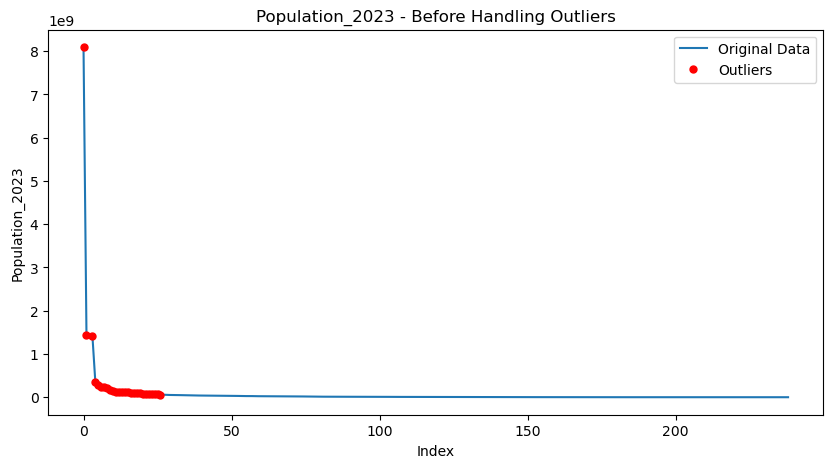

In [51]:
# Importing Library necessary for peforming the plotting of graphs
import matplotlib.pyplot as plt
# Calculating the IQR for Outlier Detection
Q1 = df['Population_2023'].quantile(0.25)
Q3 = df['Population_2023'].quantile(0.75)
IQR = Q3 - Q1
# Defining bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# For filtering any anomalies
df['Anomaly_IQR'] = (df['Population_2023'] < lower_bound) | (df['Population_2023'] > upper_bound )

# Ploting the data before handling the outliers
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Population_2023'], label='Original Data')
plt.plot(df[df['Anomaly_IQR']].index, df[df['Anomaly_IQR']]['Population_2023'], 'ro', markersize=5, label='Outliers')

# Setting the labels, title, and legend
plt.xlabel('Index')  
plt.ylabel('Population_2023') 
plt.title('Population_2023 - Before Handling Outliers')  
plt.legend()
plt.show()

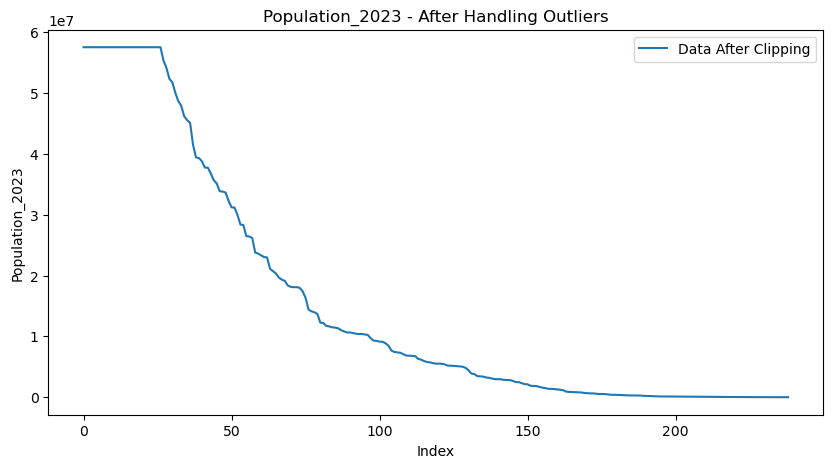

In [52]:
# Handling the outliers by clipping
df['Population_2023'] = df['Population_2023'].clip(lower=lower_bound, upper=upper_bound)

# Plotting the data after handling the outliers to view the change
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Population_2023'], label='Data After Clipping')

# Setting the labels, title, and legend
plt.xlabel('Index') 
plt.ylabel('Population_2023')
plt.title('Population_2023 - After Handling Outliers')
plt.legend()
plt.show()